## Assignment 1a: Machine Learning Methods

### \<Kaitao Li> \<a1817689>

#### How can we use data analytics to predict energy usage for this house?

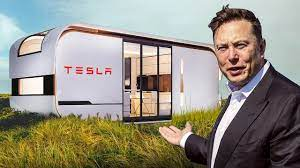

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
energy_data = pd.read_csv('energydata_complete.csv')
print(energy_data.head())

               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11/01/2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11/01/2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11/01/2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11/01/2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11/01/2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  


### 2. Analyse and visualise the data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"

# print(energy_data.describe())

In [17]:
fig_lights = px.scatter(energy_data, x='lights', y='Appliances', trendline="ols",
                        title='Appliances vs. Lights')
fig_T_out = px.scatter(energy_data, x='T_out', y='Appliances', trendline="ols",
                        title='Appliances vs. T_out')
fig_Press_mm_hg = px.scatter(energy_data, x='Press_mm_hg', y='Appliances', trendline="ols",
                        title='Appliances vs. Press_mm_hg')
fig_Windspeed= px.scatter(energy_data, x='Windspeed', y='Appliances', trendline="ols",
                        title='Appliances vs. Windspeed')
fig_RH_out = px.scatter(energy_data, x='RH_out', y='Appliances', trendline="ols",
                        title='Appliances vs. RH_out')
fig_Tdewpoint = px.scatter(energy_data, x='Tdewpoint', y='Appliances', trendline="ols",
                        title='Appliances vs. Tdewpoint')




fig_lst=[fig_lights,fig_T_out,fig_Press_mm_hg,fig_Windspeed,fig_RH_out,fig_Tdewpoint]

for i in range(1,10):
    fig_lst.append(px.scatter(energy_data, x=f'T{i}', y='Appliances', trendline="ols",
                    title=f'Appliances vs. T{i}'))

for each_fig in fig_lst:
    trendline_trace_index = len(each_fig.data) - 1
    each_fig.data[trendline_trace_index].line.color = 'red'

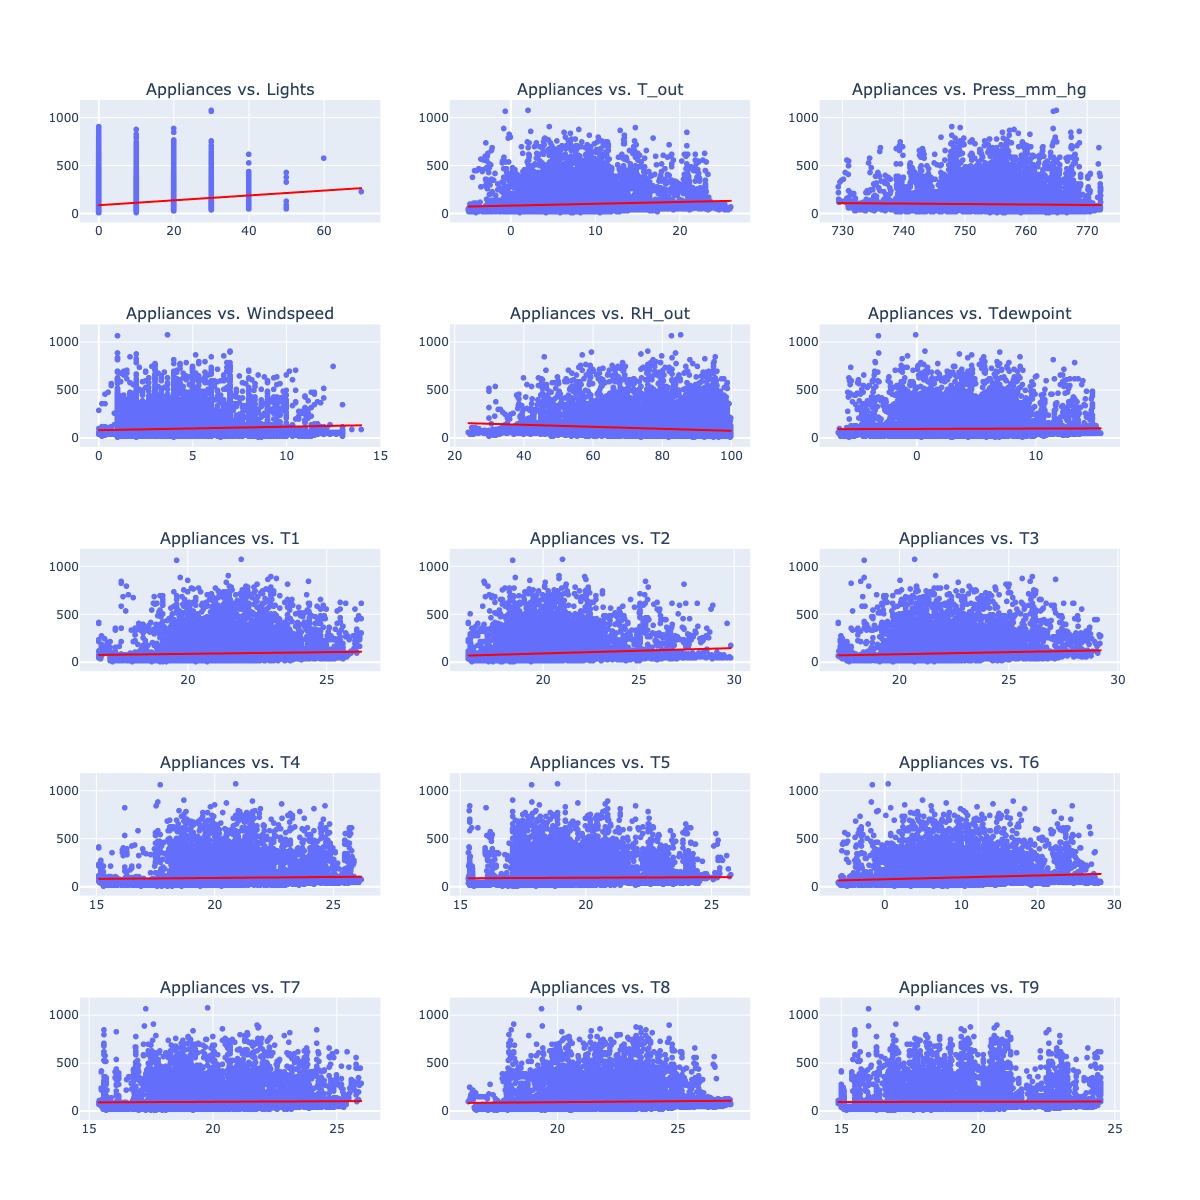

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

fig_subplots_title = []
for each_fig in fig_lst:
    fig_subplots_title.append(each_fig.layout.title.text)

fig_subplots = make_subplots(rows=5, cols=3,subplot_titles=(fig_subplots_title))


row = 1
col = 0
for each_fig in fig_lst:
    col += 1
    if col > 3:
        col = 1
        row +=1
    for trace in each_fig.data:
        fig_subplots.add_trace(trace, row=row, col=col)
    

fig_subplots.update_layout(
    height=1200,
    width=1200
)
fig_subplots.show()

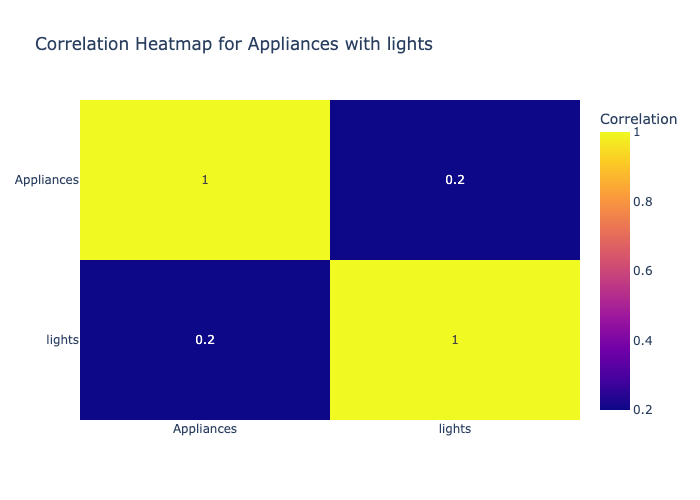

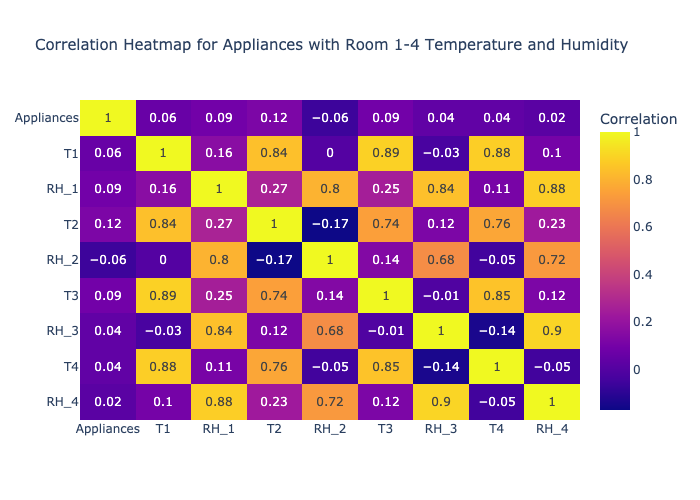

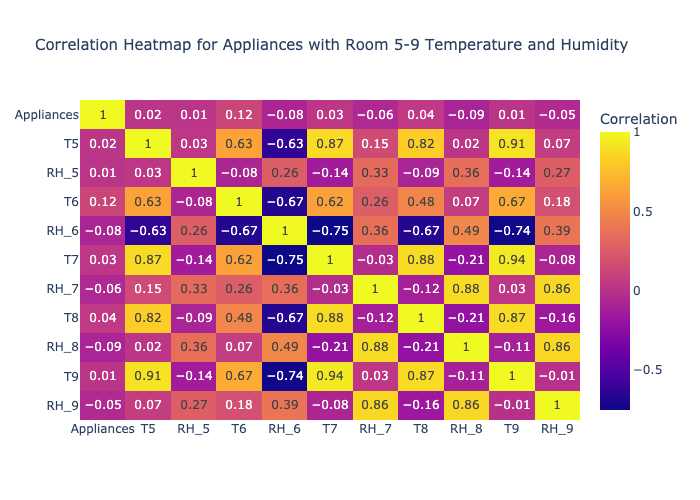

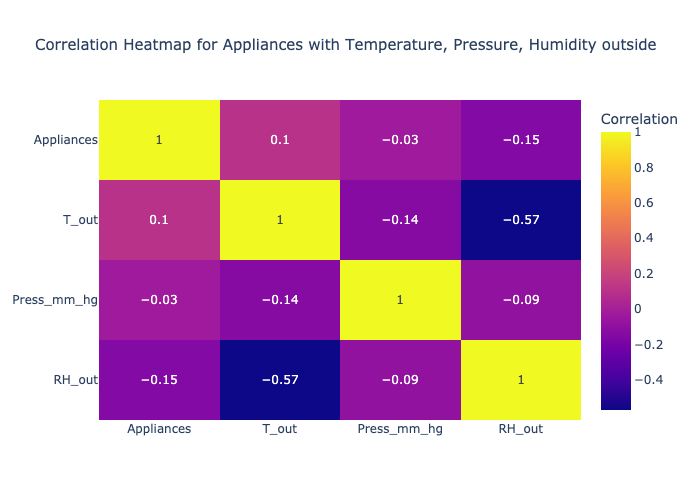

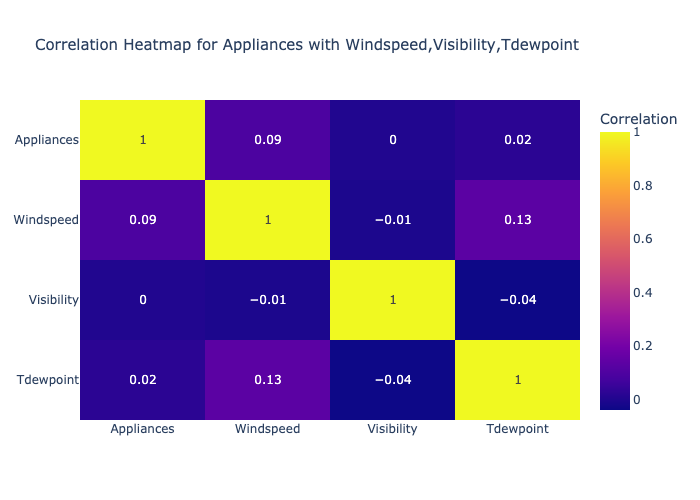

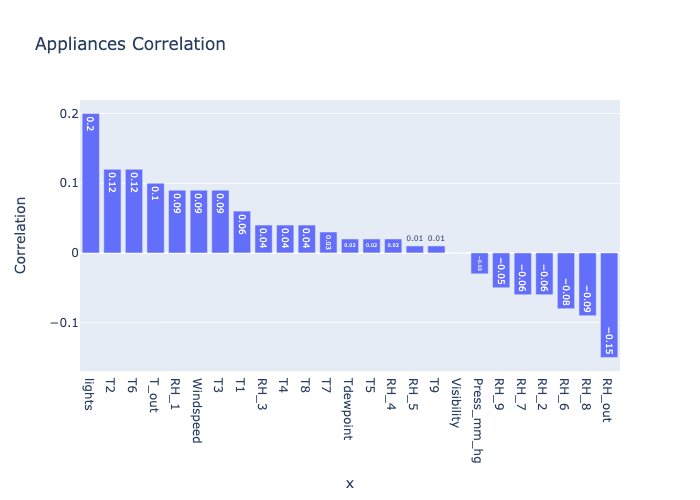

In [21]:
pearson_correlation = energy_data[['Appliances', 'lights']].corr(method='pearson').round(2)
fig = px.imshow(pearson_correlation, text_auto=True, aspect="auto",
                title="Correlation Heatmap for Appliances with lights",
                labels=dict(color="Correlation"))
fig.show() 



t_r_list=['Appliances']
for i in range(1,5):
    t_r_list.append(f'T{i}')
    t_r_list.append(f'RH_{i}')
    
pearson_correlation = energy_data[t_r_list].corr(method='pearson').round(2)


fig = px.imshow(pearson_correlation, text_auto=True, aspect="auto",
                title="Correlation Heatmap for Appliances with Room 1-4 Temperature and Humidity",
                labels=dict(color="Correlation"))


fig.update_layout(title=dict(text="Correlation Heatmap for Appliances with Room 1-4 Temperature and Humidity",
                             font=dict(size=15))) 
fig.show() 

t_r_list=['Appliances']

for i in range(5,10):
    t_r_list.append(f'T{i}')
    t_r_list.append(f'RH_{i}')
    
pearson_correlation = energy_data[t_r_list].corr(method='pearson').round(2)


fig = px.imshow(pearson_correlation, text_auto=True, aspect="auto",
                title="Correlation Heatmap for Appliances with Room 5-9 Temperature and Humidity",
                labels=dict(color="Correlation"))

fig.update_layout(title=dict(text="Correlation Heatmap for Appliances with Room 5-9 Temperature and Humidity",
                             font=dict(size=15))) 
fig.show() 


pearson_correlation = energy_data[['Appliances', 'T_out','Press_mm_hg', 'RH_out']].corr(method='pearson').round(2)
fig = px.imshow(pearson_correlation, text_auto=True, aspect="auto",
                title="Correlation Heatmap for Appliances with Temperature,Pressure,Humidity outside",
                labels=dict(color="Correlation"))

fig.update_layout(title=dict(text="Correlation Heatmap for Appliances with Temperature, Pressure, Humidity outside",
                             font=dict(size=15))) 
fig.show() 


# pearson_correlation = energy_data[['Appliances', 'RH_6']].corr(method='pearson').round(2)

pearson_correlation = energy_data[['Appliances', 'Windspeed','Visibility', 'Tdewpoint']].corr(method='pearson').round(2)
fig = px.imshow(pearson_correlation, text_auto=True, aspect="auto",
                title="Correlation Heatmap for Appliances with Windspeed,Visibility,Tdewpoint",
                labels=dict(color="Correlation"))

fig.update_layout(title=dict(text="Correlation Heatmap for Appliances with Windspeed,Visibility,Tdewpoint",
                             font=dict(size=15))) 
fig.show() 

# this one just for fun
# pearson_correlation = energy_data[['Appliances', 'rv1','rv2']].corr(method='pearson').round(2)
# fig = px.imshow(pearson_correlation, text_auto=True, aspect="auto",
#                 title="Correlation Heatmap for Appliances with rv1,rv2",
#                 labels=dict(color="Correlation"))
# fig.show() 




pearson_correlation = energy_data.drop(columns=['date','rv1','rv2']).corr(method='pearson').round(2)
# print(pearson_correlation)
appliances_corr_descending = pearson_correlation.loc['Appliances'].sort_values(ascending=False)
appliances_corr_ascending = pearson_correlation.loc['Appliances'].sort_values(ascending=True)
# print(appliances_corr_descending)
# print(appliances_corr_ascending)
# print(appliances_corr_descending.index)

fig = px.bar(x=appliances_corr_descending.drop(labels=['Appliances']).index, y=appliances_corr_descending.drop(labels=['Appliances']).values,
             labels={'y': 'Correlation'},
             title='Appliances Correlation',
             text_auto=True)
fig.show()

Based on the above data virtualisation, it can be shown that the lights and outside Humidity are the first and second largest correlation coefficients with Appliances' energy consumption. Besides, among these elements, visibility shows no correlation coefficients with appliances which needs to be removed in the following data pre-processing process. Furthermore, multicollinearity could be frequently found in the data set, for example, the correlation coefficient between T9 and T7 is 0.94, which is highly correlated. This may caused by the nature of the measurement object. For example, the variance of Humidity or Temperature between different rooms is limited, which leads to multicollinearity that could cause redundant explanations for the dependent variable. 

### 3. Pre-process the data

In [8]:
energy_data['date'] = pd.to_datetime(energy_data['date'], format='%d/%m/%Y %H:%M')
energy_data['week_status'] = energy_data['date'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)
# print(energy_data['week_status'])

energy_data['day_of_week'] = energy_data['date'].dt.dayofweek
# energy_data['month'] = energy_data['date'].dt.month

day_of_week_dummies = pd.get_dummies(energy_data['day_of_week'], prefix='day')
# month_dummies = pd.get_dummies(energy_data['month'], prefix='month')

energy_data = pd.concat([energy_data, day_of_week_dummies], axis=1)

energy_data['NSM'] = (
    energy_data['date'].dt.hour * 3600 +
    energy_data['date'].dt.minute * 60 +
    energy_data['date'].dt.second
)




Based on date information, adding th features according to the paper

### 4. Implement, train and test prediction models

In [9]:
print(energy_data.columns.tolist())
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'week_status', 'day_of_week', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'NSM']


In [10]:
#LinearRegression
data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1) 
y = energy_data['Appliances']  


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

regressor_no_scaled = LinearRegression()
regressor_no_scaled.fit(x_train, y_train)
y_pred = regressor_no_scaled.predict(x_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mape = mean_absolute_percentage_error(y_test,y_pred)*100
print("Not Scaled:")
print(f"Root Mean Squared Error: {lr_rmse}")
print(f"R-squared: {lr_r2}")
print(f"MAE: {lr_mae}")
print(f"MAPE: {lr_mape}")
print("----------------------------------")


scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x_train = scaler_x.fit_transform(x_train)
scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
scaled_x_test = scaler_x.transform(x_test)
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1,1))

regressor_scaled = LinearRegression()
regressor_scaled.fit(scaled_x_train, scaled_y_train)
y_pred_scaled = regressor_scaled.predict(scaled_x_test)

y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled)
scaled_y_test = scaler_y.inverse_transform(scaled_y_test)

lr_scaled_mse = mean_squared_error(scaled_y_test, y_pred_scaled)
lr_scaled_rmse = sqrt(lr_scaled_mse)
lr_scaled_r2 = r2_score(scaled_y_test, y_pred_scaled)
lr_scaled_mae = mean_absolute_error(scaled_y_test, y_pred_scaled)
lr_scaled_mape = mean_absolute_percentage_error(scaled_y_test,y_pred_scaled)*100
print("Scaled:")
print(f"Root Mean Squared Error: {lr_scaled_rmse}")
print(f"R-squared: {lr_scaled_r2}")
print(f"MAE: {lr_scaled_mae}")
print(f"MAPE: {lr_scaled_mape}")


Not Scaled:
Root Mean Squared Error: 88.21183770936511
R-squared: 0.18393254626993705
MAE: 51.79719396053556
MAPE: 62.04019601494666
----------------------------------
Scaled:
Root Mean Squared Error: 88.21183770936526
R-squared: 0.18393254626993427
MAE: 51.797193960535154
MAPE: 62.040196014947725


In [11]:
#RandomForest
data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

random_forest_regressor = RandomForestRegressor(max_features=18, n_estimators=300, n_jobs = -1) #Hyperparameters refer to the paper

random_forest_regressor.fit(x_train,y_train)
y_pred = random_forest_regressor.predict(x_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mape = mean_absolute_percentage_error(y_test,y_pred)*100
print("Not Scaled:")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R-squared: {rf_r2}")
print(f"MAE: {rf_mae}")
print(f"MAPE: {rf_mape}")

print("----------------------------------")


scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x_train = scaler_x.fit_transform(x_train)
scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
scaled_x_test = scaler_x.transform(x_test)
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1,1))

rf_scaled = RandomForestRegressor(max_features=18, n_estimators=300,n_jobs = -1)
rf_scaled.fit(scaled_x_train, scaled_y_train.ravel())
y_pred_scaled = rf_scaled.predict(scaled_x_test)

y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
scaled_y_test = scaler_y.inverse_transform(scaled_y_test)

rf_scaled_mse = mean_squared_error(scaled_y_test, y_pred_scaled)
rf_scaled_rmse = sqrt(rf_scaled_mse)
rf_scaled_r2 = r2_score(scaled_y_test, y_pred_scaled)
rf_scaled_mae = mean_absolute_error(scaled_y_test, y_pred_scaled)
rf_scaled_mape = mean_absolute_percentage_error(scaled_y_test,y_pred_scaled)*100
print("Scaled:")
print(f"Root Mean Squared Error: {rf_scaled_rmse}")
print(f"R-squared: {rf_scaled_r2}")
print(f"MAE: {rf_scaled_mae}")
print(f"MAPE: {rf_scaled_mape}")

Not Scaled:
Root Mean Squared Error: 61.11990828578379
R-squared: 0.6082241099565179
MAE: 28.442913430147474
MAPE: 28.387063235824954
----------------------------------
Scaled:
Root Mean Squared Error: 60.787164102911426
R-squared: 0.6124782491104521
MAE: 28.431892378700862
MAPE: 28.38462394238155


In [20]:
#GBM
from sklearn.ensemble import GradientBoostingRegressor

data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) 

gbm = GradientBoostingRegressor(n_estimators=10900, max_depth=5, random_state=42) #Hyperparameters refer to the paper

gbm.fit(x_train,y_train)
y_pred = gbm.predict(x_test)

gbm_mse = mean_squared_error(y_test, y_pred)
gbm_rmse = sqrt(gbm_mse)
gbm_r2 = r2_score(y_test, y_pred)
gbm_mae = mean_absolute_error(y_test, y_pred)
gbm_mape = mean_absolute_percentage_error(y_test,y_pred)*100
print("Not Scaled:")
print(f"Root Mean Squared Error: {gbm_rmse}")
print(f"R-squared: {gbm_r2}")
print(f"MAE: {gbm_mae}")
print(f"MAPE: {gbm_mape}")

print("----------------------------------")


scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x_train = scaler_x.fit_transform(x_train)
scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
scaled_x_test = scaler_x.transform(x_test)
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1,1))

gbm_scaled = GradientBoostingRegressor(n_estimators=10900, max_depth=5, random_state=42)
gbm_scaled.fit(scaled_x_train, scaled_y_train.ravel())
y_pred_scaled = gbm_scaled.predict(scaled_x_test)

y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
scaled_y_test = scaler_y.inverse_transform(scaled_y_test)

gbm_scaled_mse = mean_squared_error(scaled_y_test, y_pred_scaled)
gbm_scaled_rmse = sqrt(gbm_scaled_mse)
gbm_scaled_r2 = r2_score(scaled_y_test, y_pred_scaled)
gbm_scaled_mae = mean_absolute_error(scaled_y_test, y_pred_scaled)
gbm_scaled_mape = mean_absolute_percentage_error(scaled_y_test,y_pred_scaled)*100
print("Scaled:")
print(f"Root Mean Squared Error: {gbm_scaled_rmse}")
print(f"R-squared: {gbm_scaled_r2}")
print(f"MAE: {gbm_scaled_mae}")
print(f"MAPE: {gbm_scaled_mape}")

Not Scaled:
Root Mean Squared Error: 63.741820926755366
R-squared: 0.5738904674534926
MAE: 30.880655875771875
MAPE: 31.7182946691443
----------------------------------
Scaled:
Root Mean Squared Error: 64.07262201472908
R-squared: 0.5694562276201953
MAE: 31.066830525377902
MAPE: 31.963940124490076


In [19]:
from sklearn.svm import SVR

data_to_drop = ['date', 'rv1', 'rv2', 'Appliances', 'Visibility', 'day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


svm = SVR(kernel='rbf', C=12, gamma=3.125) #Hyperparameters refer to the paper, sigma = 0.4, gamma = 1/2*sigma^2
svm.fit(x_train_scaled, y_train)  
y_pred = svm.predict(x_test_scaled) 


svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = sqrt(svm_mse)  
svm_r2 = r2_score(y_test, y_pred)
svm_mae = mean_absolute_error(y_test, y_pred)
svm_mape = mean_absolute_percentage_error(y_test, y_pred) * 100


print("Not Scaled:")  
print(f"Root Mean Squared Error: {svm_rmse}")
print(f"R-squared: {svm_r2}")
print(f"MAE: {svm_mae}")
print(f"MAPE: {svm_mape}")


print("----------------------------------")


scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_x_train = scaler_x.fit_transform(x_train)
scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1,1))
scaled_x_test = scaler_x.transform(x_test)
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1,1))

svm_scaled = SVR(kernel='rbf', C=12, gamma=0.4)
svm_scaled.fit(scaled_x_train, scaled_y_train.ravel())
y_pred_scaled = svm_scaled.predict(scaled_x_test)

y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))
scaled_y_test = scaler_y.inverse_transform(scaled_y_test)

svm_scaled_mse = mean_squared_error(scaled_y_test, y_pred_scaled)
svm_scaled_rmse = sqrt(svm_scaled_mse)
svm_scaled_r2 = r2_score(scaled_y_test, y_pred_scaled)
svm_scaled_mae = mean_absolute_error(scaled_y_test, y_pred_scaled)
svm_scaled_mape = mean_absolute_percentage_error(scaled_y_test,y_pred_scaled)*100
print("Scaled:")
print(f"Root Mean Squared Error: {svm_scaled_rmse}")
print(f"R-squared: {svm_scaled_r2}")
print(f"MAE: {svm_scaled_mae}")
print(f"MAPE: {svm_scaled_mape}")



Not Scaled:
Root Mean Squared Error: 92.73457865898482
R-squared: 0.09810552941002604
MAE: 37.55829613922371
MAPE: 26.544383245621965
----------------------------------
Scaled:
Root Mean Squared Error: 66.60645956398214
R-squared: 0.5347300358340847
MAE: 28.823701813072017
MAPE: 26.05430880242181


## Cross validation

In [48]:
#30 results from 10 fold cross validation (CV) sets and 3 repeats(Candanedo, Feldheim &Deramaix 2017).
#LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']

rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)


lr_cv_rmse = -cross_val_score(LinearRegression(),X,y, cv = rkf, scoring='neg_root_mean_squared_error')
lr_cv_r2 = cross_val_score(LinearRegression(),X,y, cv = rkf, scoring='r2')
lr_cv_mae = -cross_val_score(LinearRegression(),X,y, cv = rkf, scoring='neg_mean_absolute_error')
lr_cv_mape = -cross_val_score(LinearRegression(),X,y, cv = rkf, scoring='neg_mean_absolute_percentage_error')*100
# print("Under cross validation")
# print("RMSE scores:", -cv_rmse)
# print("----------------------------------")
# print("r2 scores:", cv_r2)
# print("----------------------------------")
# print("MAE scores:", -cv_mae)
# print("----------------------------------")
# print("MAPE scores:", -cv_mape)
# print("----------------------------------")
print("Not Scaled:")
print("Mean RMSE scores:", lr_cv_rmse.mean())
print("Mean r2 scores:", lr_cv_r2.mean())
print("Mean MAE scores:", lr_cv_mae.mean())
print("Mean MAPE scores:", lr_cv_mape.mean())
# extremely close to the result shown in the report, which with RMSE 93.18, R2 0.16, MAE 51.97, MAPE 59.93. 


rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
lr_scaled_cv_rmse = -cross_val_score(pipeline,X,y, cv = rkf, scoring='neg_root_mean_squared_error')
lr_scaled_cv_r2 = cross_val_score(pipeline,X,y, cv = rkf, scoring='r2')
lr_scaled_cv_mae = -cross_val_score(pipeline,X,y, cv = rkf, scoring='neg_mean_absolute_error')
lr_scaled_cv_mape = -cross_val_score(pipeline,X,y, cv = rkf, scoring='neg_mean_absolute_percentage_error')*100
print("----------------------------------")
print("Scaled")
# print("RMSE scores:", -cv_rmse)
# print("----------------------------------")
# print("r2 scores:", cv_r2)
# print("----------------------------------")
# print("MAE scores:", -cv_mae)
# print("----------------------------------")
# print("MAPE scores:", -cv_mape)
# print("----------------------------------")
print("Mean RMSE scores:", lr_scaled_cv_rmse.mean())
print("Mean r2 scores:", lr_scaled_cv_r2.mean())
print("Mean MAE scores:", lr_scaled_cv_mae.mean())
print("Mean MAPE scores:", lr_scaled_cv_mape.mean())

Not Scaled:
Mean RMSE scores: 93.26511751715675
Mean r2 scores: 0.16982979935175527
Mean MAE scores: 52.83736363012304
Mean MAPE scores: 60.92790262443236
----------------------------------
Scaled
Mean RMSE scores: 93.26513150925356
Mean r2 scores: 0.16982871813014022
Mean MAE scores: 52.83907606255842
Mean MAPE scores: 60.92853489432389


In [49]:
#30 results from 10 fold cross validation (CV) sets and 3 repeats(Candanedo, Feldheim &Deramaix 2017).
#RandomForest
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']

rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

scoring = {
    'neg_rmse':'neg_root_mean_squared_error',
    'r2':'r2',
    'neg_mae':'neg_mean_absolute_error',
    'neg_mape':'neg_mean_absolute_percentage_error'
}

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=300, max_features=18, n_jobs=-1))
])

print("Not Scaled:")
scores = cross_validate(RandomForestRegressor(random_state=42,n_estimators = 300,max_features = 18, n_jobs=-1),X,y, cv = rkf, scoring=scoring)
for scorer in scoring:
    if scorer in ['neg_rmse', 'neg_mae', 'neg_mape']:
        mean_test_score = -np.mean(scores[f'test_{scorer}'])
        if scorer == 'neg_rmse':
            rf_cv_rmse = mean_test_score
        elif scorer == 'neg_mae':
            rf_cv_mae = mean_test_score
        elif scorer == 'neg_mape':
            mean_test_score = mean_test_score*100
            rf_cv_mape = mean_test_score
    else:
        mean_test_score = np.mean(scores[f'test_{scorer}'])
        rf_cv_r2 = mean_test_score
    print(f"Mean {scorer} scores:", mean_test_score)

print("----------------------------------")
print("Scaled:")
scores = cross_validate(pipeline,X,y, cv = rkf, scoring=scoring)
for scorer in scoring:
    if scorer in ['neg_rmse', 'neg_mae', 'neg_mape']:
        mean_test_score = -np.mean(scores[f'test_{scorer}'])
        if scorer == 'neg_rmse':
            rf_scaled_cv_rmse = mean_test_score
        elif scorer == 'neg_mae':
            rf_scaled_cv_mae = mean_test_score
        elif scorer == 'neg_mape':
            mean_test_score = mean_test_score*100
            rf_scaled_cv_mape = mean_test_score
    else:
        mean_test_score = np.mean(scores[f'test_{scorer}'])
        rf_scaled_cv_r2 = mean_test_score
    print(f"Mean {scorer} scores:", mean_test_score)


Not Scaled:
Mean neg_rmse scores: 64.07925471537682
Mean r2 scores: 0.6078854749442658
Mean neg_mae scores: 29.857384931575712
Mean neg_mape scores: 29.084960682253495
----------------------------------
Scaled:
Mean neg_rmse scores: 64.09249746572102
Mean r2 scores: 0.6077249954276329
Mean neg_mae scores: 29.86456256045606
Mean neg_mape scores: 29.085119241805412


In [ ]:
#GBM
data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']

rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

scoring = {
    'neg_rmse':'neg_root_mean_squared_error',
    'r2':'r2',
    'neg_mae':'neg_mean_absolute_error',
    'neg_mape':'neg_mean_absolute_percentage_error'
}

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', GradientBoostingRegressor(n_estimators=10900, max_depth=5, random_state=42))
])

print("Not Scaled:")
scores = cross_validate(GradientBoostingRegressor(n_estimators=10900, max_depth=5, random_state=42),X,y, cv = rkf, scoring=scoring)
for scorer in scoring:
    if scorer in ['neg_rmse', 'neg_mae', 'neg_mape']:
        mean_test_score = -np.mean(scores[f'test_{scorer}'])
        if scorer == 'neg_rmse':
            gbm_cv_rmse = mean_test_score
        elif scorer == 'neg_mae':
            gbm_cv_mae = mean_test_score
        elif scorer == 'neg_mape':
            mean_test_score = mean_test_score*100
            gbm_cv_mape = mean_test_score
    else:
        mean_test_score = np.mean(scores[f'test_{scorer}'])
        gbm_cv_r2 = mean_test_score
    print(f"Mean {scorer} scores:", mean_test_score)

print("----------------------------------")
print("Scaled:")
scores = cross_validate(pipeline,X,y, cv = rkf, scoring=scoring)
for scorer in scoring:
    if scorer in ['neg_rmse', 'neg_mae', 'neg_mape']:
        mean_test_score = -np.mean(scores[f'test_{scorer}'])
        if scorer == 'neg_rmse':
            gbm_scaled_cv_rmse = mean_test_score
        elif scorer == 'neg_mae':
            gbm_scaled_cv_mae = mean_test_score
        elif scorer == 'neg_mape':
            mean_test_score = mean_test_score*100
            gbm_scaled_cv_mape = mean_test_score
    else:
        mean_test_score = np.mean(scores[f'test_{scorer}'])
        gbm_scaled_cv_r2 = mean_test_score
    print(f"Mean {scorer} scores:", mean_test_score)

In [52]:
#SVM
data_to_drop = ['date','rv1','rv2','Appliances','Visibility','day_of_week']
X = energy_data.drop(data_to_drop, axis=1)
y = energy_data['Appliances']

rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

scoring = {
    'neg_rmse':'neg_root_mean_squared_error',
    'r2':'r2',
    'neg_mae':'neg_mean_absolute_error',
    'neg_mape':'neg_mean_absolute_percentage_error'
}

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', SVR(kernel='rbf', C=12, gamma=3.125))
])

print("Not Scaled:")
scores = cross_validate(SVR(kernel='rbf', C=12, gamma=3.125),X,y, cv = rkf, scoring=scoring)
for scorer in scoring:
    if scorer in ['neg_rmse', 'neg_mae', 'neg_mape']:
        mean_test_score = -np.mean(scores[f'test_{scorer}'])
        if scorer == 'neg_rmse':
            svm_cv_rmse = mean_test_score
        elif scorer == 'neg_mae':
            svm_cv_mae = mean_test_score
        elif scorer == 'neg_mape':
            mean_test_score = mean_test_score*100
            svm_cv_mape = mean_test_score
    else:
        mean_test_score = np.mean(scores[f'test_{scorer}'])
        svm_cv_r2 = mean_test_score
    print(f"Mean {scorer} scores:", mean_test_score)

print("----------------------------------")
print("Scaled:")
scores = cross_validate(pipeline,X,y, cv = rkf, scoring=scoring)
for scorer in scoring:
    if scorer in ['neg_rmse', 'neg_mae', 'neg_mape']:
        mean_test_score = -np.mean(scores[f'test_{scorer}'])
        if scorer == 'neg_rmse':
            svm_scaled_cv_rmse = mean_test_score
        elif scorer == 'neg_mae':
            svm_scaled_cv_mae = mean_test_score
        elif scorer == 'neg_mape':
            mean_test_score = mean_test_score*100
            svm_scaled_cv_mape = mean_test_score
    else:
        mean_test_score = np.mean(scores[f'test_{scorer}'])
        svm_scaled_cv_r2 = mean_test_score
    print(f"Mean {scorer} scores:", mean_test_score)

Not Scaled:
Mean neg_rmse scores: 108.03421676458451
Mean r2 scores: -0.11376412761068974
Mean neg_mae scores: 50.133416751861205
Mean neg_mape scores: 39.88971262339675
----------------------------------
Scaled:
Mean neg_rmse scores: 97.36949159258963
Mean r2 scores: 0.09573625239800133
Mean neg_mae scores: 38.784312512810416
Mean neg_mape scores: 26.735923480917474


## GridSearch
Through this process, I can determine the optimal parameters of the model by using the target scoring function as the criterion. However, due to the limit of the computing power, I did not process the GridSearch Code.

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor


# def refit_function(cv_result):
#     rmse_scores = -cv_results['mean_test_neg_root_mean_squared_error']
#     r2_scores = cv_results['mean_test_r2']
#     rank = np.argsort(rmse_scores) + np.argsort(-r2_scores)
#     index = np.argmin(rank)
#     return index
    
# param_grid = {'n_estimators': list(range(500)),
#               'max_features': list(range(1,41))
#               }

# scoring = {
#     'neg_rmse':'neg_root_mean_squared_error',
#     'r2':'r2',
#     'neg_mae':'neg_mean_absolute_error',
#     'neg_mape':'neg_mean_absolute_percentage_error'
# }




# random_forest_regressor = RandomForestRegressor(random_state=42, n_jobs = -1)
# CV_rf = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv= 5, scoring=scoring, refit=refit_function)
# CV_rf.fit(x_train, y_train)

# print(f"Best parameters: {CV_rf.best_params_}")

### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

In [54]:
import plotly.graph_objects as go
models=['LR', 'RF', 'GBM', 'SVM']

fig = go.Figure(data=[
    go.Bar(name='no scale', x=models, y=[lr_rmse, rf_rmse, gbm_rmse,svm_rmse],text=[round(lr_rmse, 2), round(rf_rmse, 2), round(gbm_rmse, 2), round(svm_rmse, 2)],textposition='outside'),
    go.Bar(name='scaled', x=models, y=[lr_scaled_rmse, rf_scaled_rmse, gbm_scaled_rmse,svm_scaled_rmse],text=[round(lr_scaled_rmse, 2), round(rf_scaled_rmse, 2), round(gbm_scaled_rmse, 2), round(svm_scaled_rmse, 2)], textposition='outside')
])

fig.update_layout(barmode='group',xaxis_title="Model",yaxis_title="RMSE_Score")
fig.show()


In [53]:
import plotly.graph_objects as go
models=['LR', 'RF', 'GBM', 'SVM']

fig = go.Figure(data=[
    go.Bar(name='no scale', x=models, y=[lr_r2, rf_r2, gbm_r2,svm_r2],text=[round(lr_r2, 2), round(rf_r2, 2), round(gbm_r2, 2), round(svm_r2, 2)],textposition='outside'),
    go.Bar(name='scaled', x=models, y=[lr_scaled_r2, rf_scaled_r2, gbm_scaled_r2,svm_scaled_r2],text=[round(lr_scaled_r2, 2), round(rf_scaled_r2, 2), round(gbm_scaled_r2, 2), round(svm_scaled_r2, 2)], textposition='outside')
])

fig.update_layout(barmode='group',xaxis_title="Model",yaxis_title="R2_Score")
fig.show()


In [65]:
import plotly.graph_objects as go
models=['LR', 'RF', 'SVM']

fig = go.Figure(data=[
    go.Bar(name='no scale', x=models, y=[lr_cv_rmse.mean(), rf_cv_rmse,svm_cv_rmse],text=[round(lr_cv_rmse.mean(), 2), round(rf_cv_rmse, 2), round(svm_cv_rmse, 2)],textposition='outside'),
    go.Bar(name='scaled', x=models, y=[lr_scaled_cv_rmse.mean(), rf_scaled_cv_rmse,svm_scaled_cv_rmse],text=[round(lr_scaled_cv_rmse.mean(), 2), round(rf_scaled_cv_rmse, 2), round(svm_scaled_cv_rmse, 2)], textposition='outside')
])

fig.update_layout(barmode='group',xaxis_title="Model",yaxis_title="CV_rmse_Score")
fig.show()


In [64]:
import plotly.graph_objects as go
models=['LR', 'RF', 'SVM']

fig = go.Figure(data=[
    go.Bar(name='no scale', x=models, y=[lr_cv_r2.mean(), rf_cv_r2,svm_cv_r2],text=[round(lr_cv_r2.mean(), 2), round(rf_cv_r2, 2), round(svm_cv_r2, 2)],textposition='outside'),
    go.Bar(name='scaled', x=models, y=[lr_scaled_cv_r2.mean(), rf_scaled_cv_r2,svm_scaled_cv_r2],text=[round(lr_scaled_cv_r2.mean(), 2), round(rf_scaled_cv_r2, 2), round(svm_scaled_cv_r2, 2)], textposition='outside')
])

fig.update_layout(barmode='group',xaxis_title="Model",yaxis_title="CV_R2_Score")
fig.show()


According to Candanedo, Feldheim and Deramaix (2017), the model selection criteria is the one provided the lower RMSE and highest R2 value. It is pretty obvious that the scaled Random forest model provided the highest R2 value (0.61) and lowest RMSE value (60.79). Unfortunately, for the cross validation, the computing power is not enough to support validating the gbm model, but the Random forest model still have the best performance among the linear regression model and SVM during cross validation. In this case, scaled Random forest model will be selected.

### 6. Reflect on what you have learned by completing this assignment and how to improve the models

## Reflection on Completing Assignment
This assignment is my first assignment related to machine learning, and also my first attempt at training models. So, to be honest, it is quite challenging for me. During the process of exploration, I realised that it doesn’t actually take too long to train the model, but for better outcomes, taking more time to explore data is necessary. Virtualising the data, and finding the correlation between data is so vital for feature selection and further data processing.

Moreover, reading papers is another key that I found crucial. As this is my first try in the machine learning field, at first I didn't have any idea where to start. Read the paper over and over then each time I acquire a new understanding of the data, model, and object. I believe that without the information provided in the paper, I definitely can't achieve this homework to this extent. Except for the paper, being familiar with the related library (sklearn, plotly) is also important as it is concerned with the implementation part after gaining knowledge and ideas from the paper and data.

## Models Performance Improvement
Regarding model performance improvement, I believe there are two parts. First, it is about feature selection. Select the feature that has a correlation with the target value and drop the unnecessary features. Also, identifying more related features that outside the data set could be useful for improving the model's performance like the time-related feature in this assignment (which is another example shows the importance of reading paper). Second, it's related to the parameter of the model. There are two ways to identify the suitable parameter, one is reading the paper and using the tested parameter for the model. Another one is using GridSearch to find out the best parameter for the model with a fixed scoring target. But this one requires a huge of computing power so my assignment is basically referencing the paper while setting the parameters of the model.

## Conclusion
Overall, I have learnt a lot in this assignment. I believe with more practice, I will be more familiar with these processes and could become more adept at achieving the intended outcome.

### 7. References

Candanedo, LM, Feldheim, VE & Deramaix D 2017, 'Data driven prediction models of energy use of appliances in a low-energy house'. Energy and Buildings, no. 140, pp 81-97, accessed  18 Feb 2024, <https://www.sciencedirect.com/science/article/pii/S0378778816308970>.